# Cross reference Capak and Hunt catalogs

GDW / 2018apr12

In [1]:
%matplotlib inline

from astropy.io import ascii    
import numpy as np
import matplotlib.pyplot as plt

## Read COSMOS catalog

In [2]:
cosmos_infile = '../Capak/deimos_redshifts.tbl'

In [3]:
cosmos = ascii.read( cosmos_infile)

In [4]:
cosmos.info

<Table masked=True length=10770>
  name   dtype  n_bad
------- ------- -----
     ID    str8   216
     ra float64     0
    dec float64     0
    sel   int64     0
   imag float64   125
   kmag float64   485
  zspec float64  2240
  Qflag   int64     0
      Q float64     0
Remarks   str70  3533

select cosmos targets in range 0.5<z<0.6

In [5]:
buf = np.where( (cosmos['Q'] == 2.0) & (cosmos['zspec'] > 0.5) & (cosmos['zspec'] < 0.6))
good = buf[0]
cosmos_good = cosmos[good]
n = len(cosmos_good)
print n

275


In [6]:
ra1  = np.array(cosmos_good['ra'])
dec1 = np.array(cosmos_good['dec'])

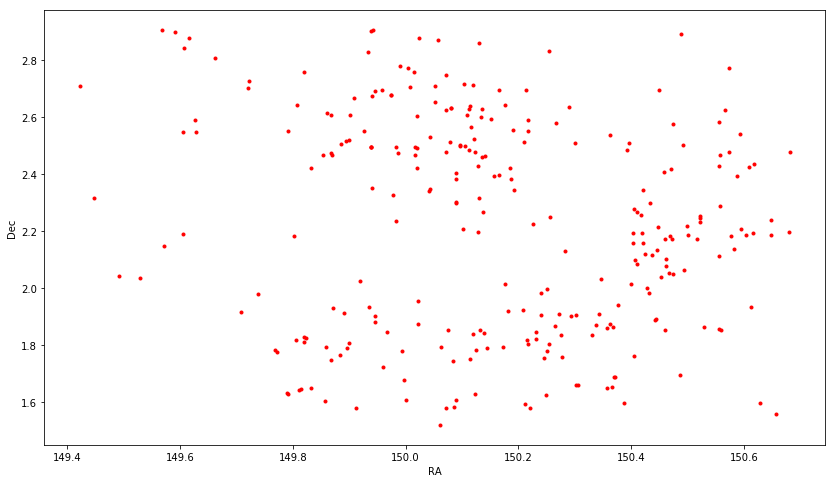

In [7]:
plt.figure(figsize=(14,8))
plt.plot( ra1, dec1, 'r.')
plt.xlabel( "RA")
plt.ylabel( "Dec")

## Read Lucas's Catalog

In [8]:
infile = '../COSMOS_LCBG_CATALOG/COSMOS_LAMBDAR_CATALOG.csv'
data = ascii.read( infile, format='csv', guess=False)

In [24]:
buf = np.where( (data['SG_MASTER'] == 0) & (data['Z_BEST'] > 0.5) 
               & (data['Z_BEST'] < 0.6) & (data['Z_USE'] < 3) 
               & (data['LAMBDAR_COSMOS2015_sep'] < 0.8)
              & ( data['is_LCBG'] == 1))
good = buf[0]
lcbg = data[good]
print len(lcbg)

602


In [10]:
ra2  = np.array(lcbg['RA'])
dec2 = np.array(lcbg['DEC'])

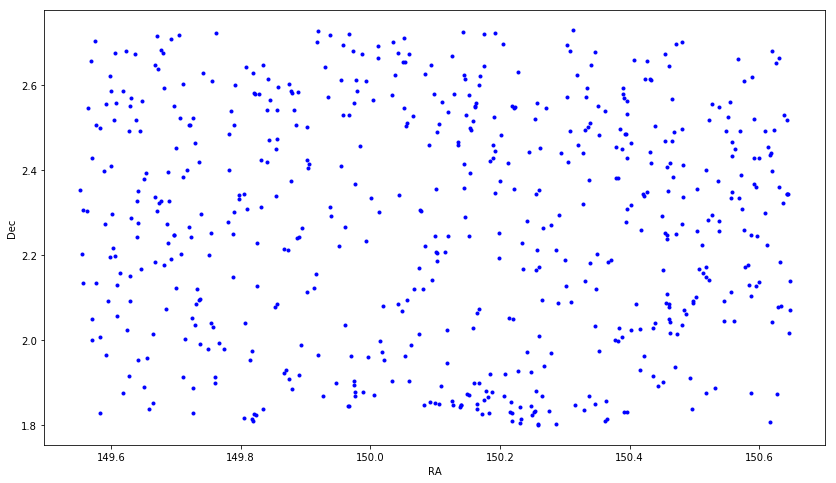

In [11]:
plt.figure(figsize=(14,8))
plt.plot( ra2, dec2, 'b.' )
plt.xlabel( "RA")
plt.ylabel( "Dec")

## Prepare to match catalogs

In [12]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [13]:
c1 = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
c2 = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)

In [14]:
idx, d2d, d3d = c2.match_to_catalog_sky(c1)

In [15]:
print len(idx)
print idx

602
[226  11  70  94 256 162 153 124  62 131 184 215 215 271 261 261  23 244
   3 237 252  14  14 126 155  11  73  32  32 202   8  88 204 225 177  32
 152  11  15  16  25  25  95  95  95  81  67  94  65  67  65 148 122 145
 158 125 182 182 182 182 225 225   7  22   7  12  12   7  12  11  11  22
  34  22  22  22  50  38  44 104 104  92  86  86  50  86 141 129 118 156
 104 127 127 153 162 153 143 148 202 202 202 184 184 202 184 195 195 195
 177 195 195 254 240 240 254 240 203 262 203 249 249 236 236 236 258 258
 262 256 256   1   8   8   8   8   8  32  12  32  23  23  32  32  32  32
  62 111 151 151 151 208 154 154 215 184 184 151 184 202 253 208 253 215
 215 261 250 227 227 234 227 253 253 261 261 265 265 268 268 254 268   8
   5   5   8   8   8   8   8   8   8  23  23  23  23  23  74  74  23  23
  74  74  72 116 116 116 139 181 164 181 206 181 206 175 175 181 247 224
 242 246 212 246 253 219 270 263 263 260   3   3  17  17   5  17  17  17
  17  17  53  17  53  88  88  88 149 149 149 14

In [16]:
print d2d

[u'0d01m29.2487s' u'0d04m03.2186s' u'0d00m00.1002s' u'0d01m09.1933s'
 u'0d03m52.257s' u'0d00m06.1914s' u'0d01m46.484s' u'0d00m22.5252s'
 u'0d03m51.8105s' u'0d01m21.6457s' u'0d04m16.4742s' u'0d01m54.2696s'
 u'0d03m39.7629s' u'0d04m56.8823s' u'0d04m25.5713s' u'0d02m01.7006s'
 u'0d02m15.5126s' u'0d01m29.2487s' u'0d03m20.2393s' u'0d00m59.5497s'
 u'0d01m55.6375s' u'0d04m42.3435s' u'0d00m17.1327s' u'0d01m07.7053s'
 u'0d01m18.7919s' u'0d05m08.8218s' u'0d02m15.5574s' u'0d06m58.0189s'
 u'0d05m17.5475s' u'0d02m05.4289s' u'0d05m01.9692s' u'0d04m49.6038s'
 u'0d01m13.3818s' u'0d01m24.6476s' u'0d02m07.3828s' u'0d03m15.3384s'
 u'0d00m55.5036s' u'0d05m16.6822s' u'0d03m00.34s' u'0d01m17.3208s'
 u'0d01m37.1591s' u'0d04m03.2384s' u'0d00m00.1125s' u'0d01m10.7101s'
 u'0d01m27.2953s' u'0d00m51.4947s' u'0d00m00.1392s' u'0d00m00.0783s'
 u'0d01m25.6425s' u'0d01m38.1932s' u'0d02m31.5027s' u'0d00m00.1371s'
 u'0d01m44.0133s' u'0d01m30.0582s' u'0d02m04.76s' u'0d01m32.1454s'
 u'0d03m08.8091s' u'0d02m51.0938s' u'0d0

plot separation...

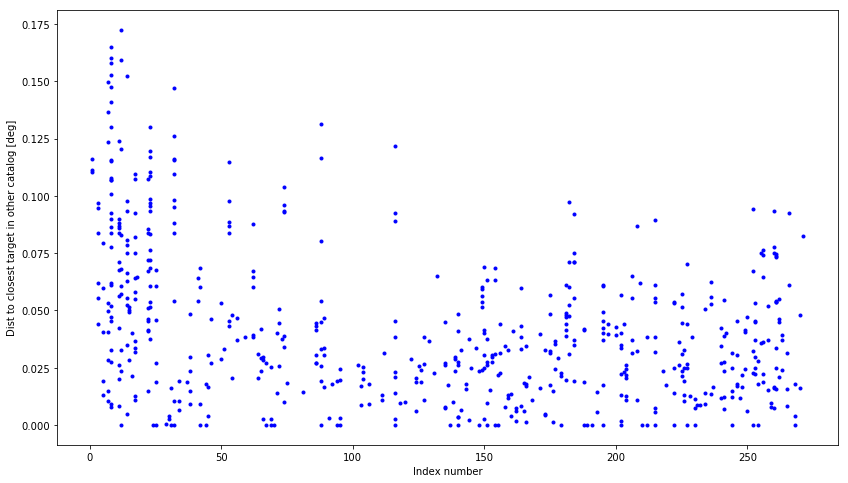

In [17]:
plt.figure(figsize=(14,8))
plt.plot( idx, d2d, 'b.' )
plt.xlabel( "Index number")
plt.ylabel( "Dist to closest target in other catalog [deg]")

## select matches that agree within an arcsec

In [18]:
max_separation = 1.0*u.arcsec
buf = np.where( d2d < max_separation)
good = buf[0]

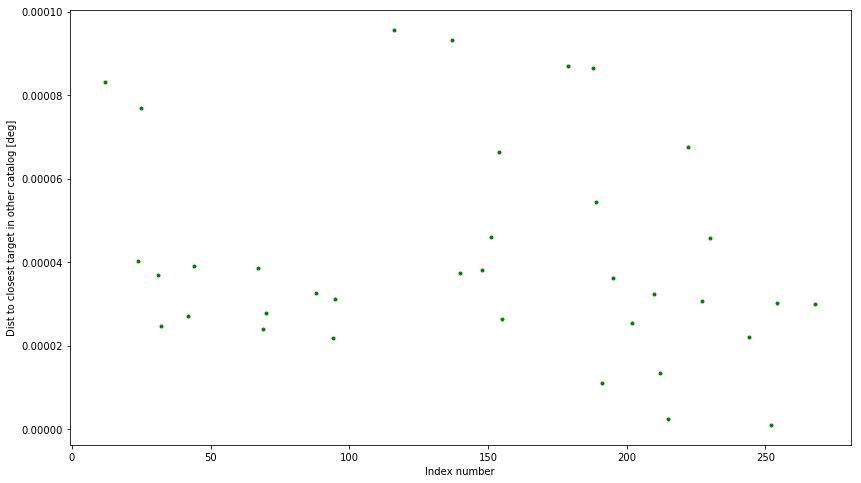

In [19]:
plt.figure(figsize=(14,8))
plt.plot( idx[good], d2d[good], 'g.' )
plt.xlabel( "Index number")
plt.ylabel( "Dist to closest target in other catalog [deg]")

In [20]:
good_idx = idx[good]
cosmos_match = cosmos_good[good_idx]

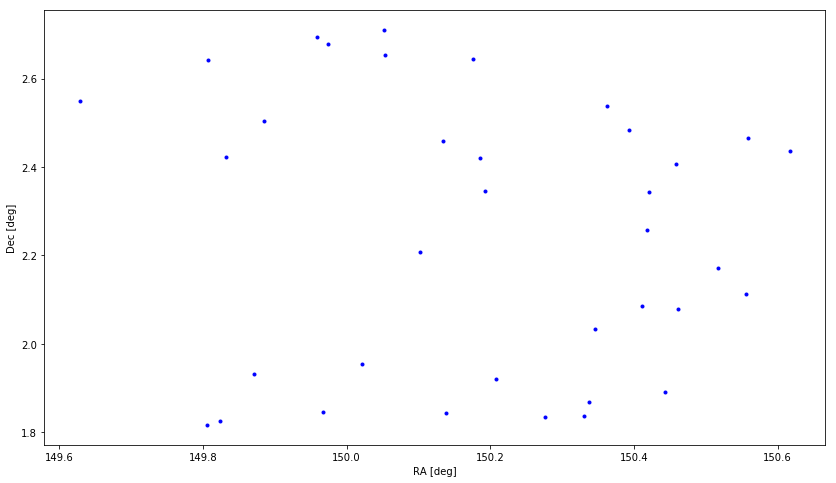

In [21]:
plt.figure(figsize=(14,8))
plt.plot( cosmos_match['ra'], cosmos_match['dec'], 'b.' )
plt.xlabel( "RA [deg]")
plt.ylabel( "Dec [deg]")

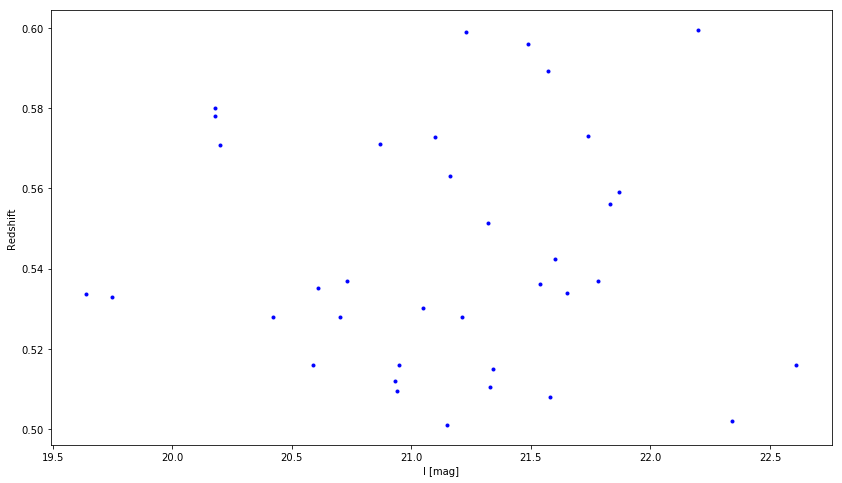

In [22]:
plt.figure(figsize=(14,8))
plt.plot( cosmos_match['imag'], cosmos_match['zspec'], 'b.' )
plt.xlabel( "I [mag]")
plt.ylabel( "Redshift")

In [23]:
print len(good_idx)

36


In [25]:
print cosmos_match

   ID        ra        dec    ... Qflag  Q               Remarks             
------- ----------- --------- ... ----- --- ---------------------------------
L909134     149.974 2.6793056 ...     4 2.0                                --
L893286 150.0529633  2.652806 ...     4 2.0 [OII],H+K,G,Hg,Hb,[OIII]d,MgI,NaI
L918923   149.95842 2.6938056 ...     4 2.0                                --
L929816   150.05183 2.7106111 ...     4 2.0                                --
L887280   150.17596 2.6441944 ...     4 2.0                                --
L826915 149.6284943 2.5494859 ...     4 2.0               [OII]d,K,Hb,[OIII]d
L781921   150.39238  2.484446 ...     4 2.0     [OII],Hb,[OIII]d,Ha,NIId,SIId
L771225    150.5582  2.466155 ...     4 2.0         [OII],K,Hg,HB,[OIII]d,MgI
L739107 150.1853333 2.4203056 ...     4 2.0         [OII],H+K,G,Hg,Hb,[OIII]d
L731281   150.45803  2.407421 ...     4 2.0                  [OII],Hb,[OIII]d
    ...         ...       ... ...   ... ...                     